with comp: 1.38% translation error, without comp: 1.94% translation error, change: 29.0
with comp: 6.1cm, without comp: 6.3cm, change: 3.96


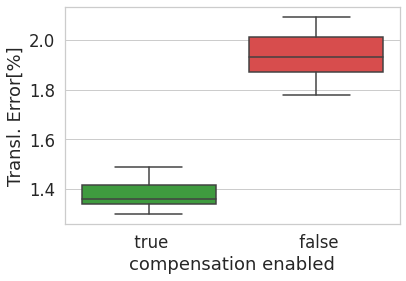

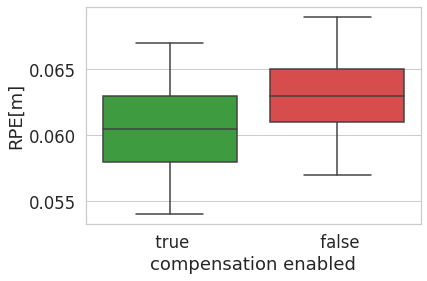

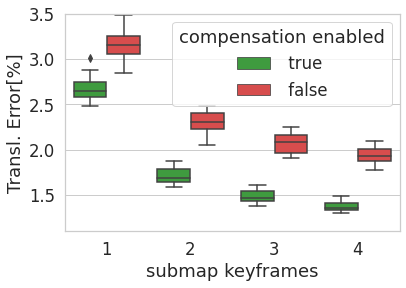

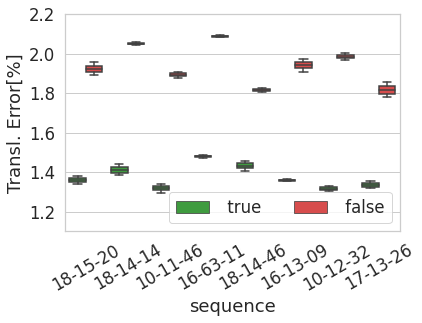

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")

colors_two = [ "#2FAB2F", "#EE3636"]
pal=sns.color_palette(colors_two)

df = pd.read_csv('./data/motion_compensation_eval_cfear_2022-04-05_1543_eval.csv', sep=r',', header=0)
df = df.rename(columns={'Trans.err.(%)': 'Transl. Error[%]'})
df = df.rename(columns={'RPE(m)': 'RPE[m]'})
df= df.rename(columns={'resolution r': 'resolution r [m]'})
x=df["sequence"].unique()
df['sequence'] = df['sequence'].apply({' 2019-01-10-12-32-52-radar-oxford-10k': '10-12-32',
 ' 2019-01-17-13-26-39-radar-oxford-10k': '17-13-26',
 ' 2019-01-10-11-46-21-radar-oxford-10k': '10-11-46',
 ' 2019-01-16-13-09-37-radar-oxford-10k': '16-13-09',
 ' 2019-01-18-15-20-12-radar-oxford-10k': '18-15-20',
 ' 2019-01-18-14-14-42-radar-oxford-10k': '18-14-14',
 ' 2019-01-18-14-46-59-radar-oxford-10k': '18-14-46',
 ' 2019-01-16-11-53-11-radar-oxford-10k': '16-63-11'}.get)
x=df["sequence"].unique()
df = df.rename(columns={'compensate': 'compensation enabled'})

dcfear3_conservative=df[ (df["cost type"]==" P2P") & (df["submap keyframes"]==4) & (df["k strongest"]==12)]

plt.figure(1)
df=df.sort_values(by=["Transl. Error[%]"])
ax = sns.boxplot(x="compensation enabled", y="Transl. Error[%]", data=dcfear3_conservative, palette=pal)
plt.savefig('./output/Motion_compensation1_cfear3_transl.pdf', format='pdf',  bbox_inches='tight')
plt.savefig('./output/Motion_compensation1_cfear3_transl.png', format='png', dpi=1500,  bbox_inches='tight')



plt.figure(2)
df=df.sort_values(by=["Transl. Error[%]"])
ax = sns.boxplot(x="compensation enabled", y="RPE[m]", data=dcfear3_conservative, palette=pal)
plt.savefig('./output/Motion_compensation2_cfear3_RPE.pdf', format='pdf',  bbox_inches='tight')
plt.savefig('./output/Motion_compensation2_cfear3_RPE.png', format='png', dpi=1500,  bbox_inches='tight')



plt.figure(3)
df=df.sort_values(by=["Transl. Error[%]"])
d3=df[ (df["cost type"]==" P2P")  & (df["k strongest"]==12)]
plt.ylim(1.1,3.5)
ax = sns.boxplot(x="submap keyframes", y="Transl. Error[%]",hue="compensation enabled", data=d3, palette=pal)
plt.savefig('./output/Motion_compensation3_submap_keyframe.pdf', format='pdf',  bbox_inches='tight')
plt.savefig('./output//Motion_compensation3_submap_keyframe.png', format='png', dpi=1500,  bbox_inches='tight')


fig=plt.figure(4)
ax=sns.boxplot(x="sequence", y="Transl. Error[%]",hue="compensation enabled", data=dcfear3_conservative, palette=pal) #, dodge=True, legend_out=False,
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.legend(ncol=2)
plt.ylim(1.1,2.2)
plt.savefig('./output/Motion_compensation4_sequence.pdf', format='pdf',  bbox_inches='tight')
plt.savefig('./output//Motion_compensation4_sequence.png', format='png', dpi=1500,  bbox_inches='tight')

#################### PRINT OUTPUT ############################
comp_avg=dcfear3_conservative[dcfear3_conservative["compensation enabled"]==" true"]["Transl. Error[%]"].mean()
nocomp_avg=dcfear3_conservative[dcfear3_conservative["compensation enabled"]==" false"]["Transl. Error[%]"].mean()
print("with comp: "+"{:.2f}% translation error".format(comp_avg)+", without comp: "+"{:.2f}% translation error".format(nocomp_avg)+", change: "+"{:.1f}".format(100*(nocomp_avg-comp_avg)/nocomp_avg) )


comp_avg=dcfear3_conservative[dcfear3_conservative["compensation enabled"]==" true"]["RPE[m]"].mean()
nocomp_avg=dcfear3_conservative[dcfear3_conservative["compensation enabled"]==" false"]["RPE[m]"].mean()
print("with comp: "+"{:.1f}cm".format(100*comp_avg)+", without comp: "+"{:.1f}cm".format(100*nocomp_avg)+", change: "+"{:.2f}".format(100*(nocomp_avg-comp_avg)/nocomp_avg) )